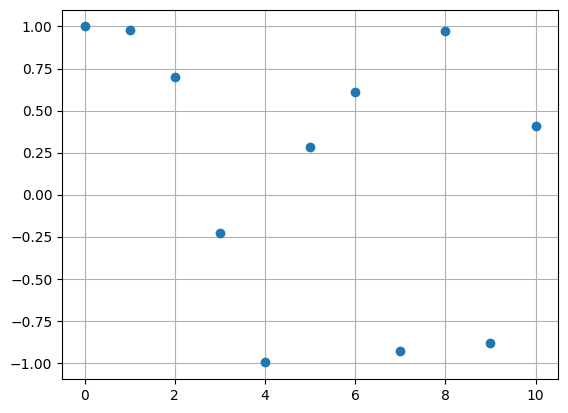

In [26]:
import numpy as np
from numpy import linspace, cos
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/5.0)
plt.plot(x,y,'o')
plt.grid(True)

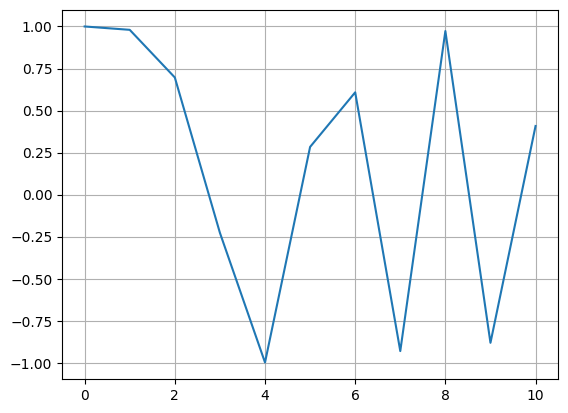

In [12]:
from scipy import interpolate

f = interpolate.interp1d(x, y,'linear')
plt.plot(x,f(x), '-')
plt.grid(True)

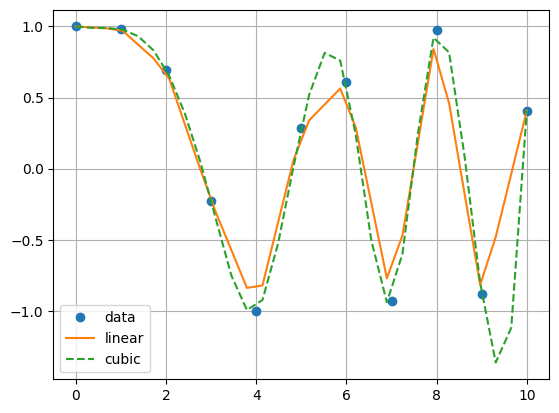

In [13]:
f2 = interpolate.interp1d(x, y, 'cubic')

xnew = np.linspace(0, 10, num=30, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc = 'best')
plt.grid(True)

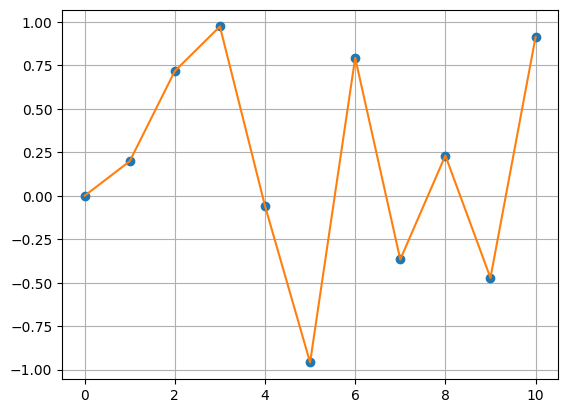

In [22]:
#Practice 5-10
x = np.linspace(0,10,num=11, endpoint=True)
y = np.sin(x**2/5.0)
plt.plot(x, y, 'o')
plt.grid(True)

from scipy import interpolate
f = interpolate.interp1d(x, y, 'linear')
plt.plot(x,f(x), '-')
plt.grid(True)

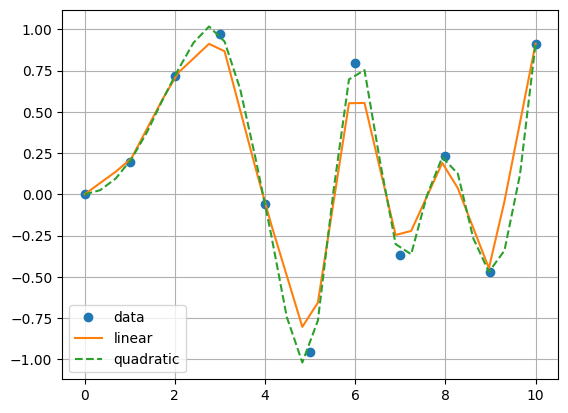

In [23]:
#Practice 5-11
f2 = interpolate.interp1d(x,y,'quadratic')

xnew = np.linspace(0,10,num=30,endpoint=True)

plt.plot(x,y,'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'quadratic'], loc= 'best')
plt.grid(True)

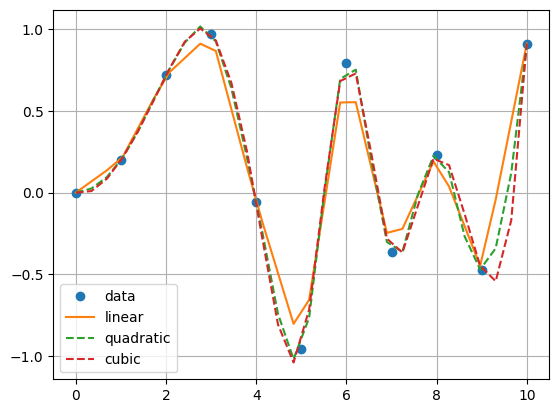

In [24]:
#Practice 5-12
f2 = interpolate.interp1d(x,y,'quadratic')
f3 = interpolate.interp1d(x,y,'cubic')

xnew = np.linspace(0, 10, num=30, endpoint=True)

plt.plot(x,y,'o', xnew,f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '--')

plt.legend(['data','linear','quadratic','cubic'],loc='best')
plt.grid(True)

In [15]:
A = np.array([[1,2,3,4,5],[6,7,8,9,10]])
U, s, Vs = sp.linalg.svd(A)
m, n = A.shape

S = sp.linalg.diagsvd(s, m, n)
print('U.S.V* = \n', U@S@Vs)


U.S.V* = 
 [[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]


In [18]:
A = np.identity(5)
A[0,:] = 1
A[:,0] = 1
A[0,0] = 5
b= np.ones(5)

(LU, piv) = sp.linalg.lu_factor(A)
L = np.identity(5) + np.tril(LU, -1)
U = np.triu(LU)
P = np.identity(5)[piv]

x = sp.linalg.lu_solve((LU,piv),b)
x


array([-3.,  4.,  4.,  4.,  4.])

In [19]:
A = np.array([[7, -1, 0, 1],
              [-1, 9, -2, 2],
              [0, -2, 8, -3],
              [1, 2, -3, 10]])
b = np.array([5, 20, 0, 20])

L = sp.linalg.cholesky(A)
t = sp.linalg.solve(L.T.conj(), b)
x = sp.linalg.solve(L, t)

print(x)


[0.75791855 2.16817496 1.24057315 1.8627451 ]


In [20]:
np.dot(A, x)

array([5.00000000e+00, 2.00000000e+01, 3.55271368e-15, 2.00000000e+01])

In [22]:
from sklearn.decomposition import NMF

X = np.array([[1,1,1],[2,2,2],[3,3,3],[4,4,4]])

W = model.fit_transform(X)
H = model.components_
W

NameError: name 'model' is not defined

In [27]:
#Practice 5-13
B = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
B

U, s, Vs = sp.linalg.svd(B)
m, n = B.shape

S = sp.linalg.diagsvd(s,m,n)
print('U.S.V = \n', U@S@Vs)

U.S.V = 
 [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [ ]:
#Practice 5-14
A = np.identity(3)
print(A)
A[0,:] = 1
A[:,0] = 1
A[0,0] = 3
b = np.ones(3)
print(A)
print(b)

(LU, piv) = sp.linalg.lu_factor(A)

L = np.identity


In [23]:
from scipy import integrate
import math

In [24]:
def calcPi(x):
  return 4/(1+x**2)

In [26]:
integrate.quad(calcPi, 0, 1)


(3.1415926535897936, 3.4878684980086326e-14)

In [27]:
integrate.quad(lambda x: 4/(1+x**2),0, 1)

(3.1415926535897936, 3.4878684980086326e-14)

In [30]:
from numpy import sin
integrate.quad(sin, 0, math.pi/1)

(2.0, 2.220446049250313e-14)

In [31]:
def I(n):
  return integrate.dblquad(lambda t, x: np.exp(-x*t)/t**n, 0, np.inf, lambda x:1, lambda x:np.inf)
  print('n=1の時:',I(1))
  print('n=2の時:',I(2))
  print('n=3の時:',I(3))
  print('n=4の時:',I(4))

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def lorenz_func(v, t, p, r, b):
  return [-p*v[0]+p*v[1], -v[0]*v[2]+r*v[0]-v[1], v[0]*v[1]-b*v[2]]

In [4]:
p = 10
r = 28
b = 8/3
v0 = [0.1, 0.1, 0.1]
t = np.arange(0, 100, 0.01)

v = odeint(lorenz_func, v0, t, args = (p, r, b))

fig = plt.figure()
ax = fig.gca(projection= '3d')
ax.plot(v[:,0],v[:,1],v[:,2])

plt.title('Lorenz')
plt.grid(True)

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

In [28]:
#Practice 5-15
from scipy import integrate

def calcl(x):
  return (x+1)**2

integrate.quad(calcl, 0, 2)

(8.666666666666668, 9.621932880084691e-14)

In [29]:
#Practice 5-16
import math
from numpy import cos

integrate.quad(cos,0,math.pi/1)

(4.9225526349740854e-17, 2.2102239425853306e-14)

In [7]:
from scipy.optimize import fsolve

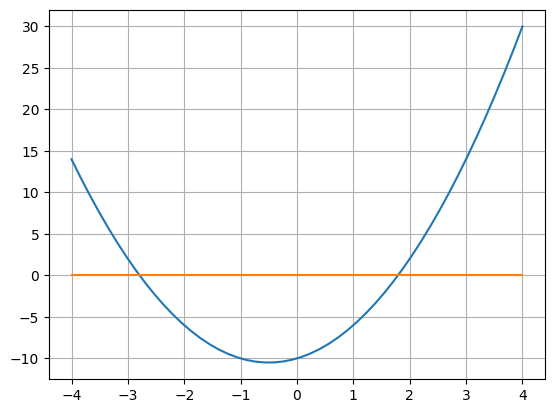

In [9]:
def f(x):
  y = 2 * x**2 + 2 * x -10
  return y

x = np.linspace(-4,4)
plt.plot(x, f(x))
plt.plot(x,np.zeros(len(x)))
plt.grid(True)

In [10]:
x = fsolve(f,2)
print(x)

[1.79128785]


In [13]:
x = fsolve(f, -3)
print(x)

[-2.79128785]


In [14]:
from scipy.optimize import minimize

def objective(x):
  x1 = x[0]
  x2 = x[1]
  x3 = x[2]
  x4 = x[3]
  return x1*x4*(x1+x2+x3)+x3

In [15]:
def constraint1(x):
  return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
  sum_sq = 40
  for i in range(4):
    sum_sq = sum_sq -x[1]**2
  return sum_sq

x0 = [1,5,5,1]
print(objective(x0))

16


In [18]:
b = (1.0,5.0)
bnds = (b,b,b,b)
con1 = {'type':'ineq','fun':constraint1}
con2 = {'type':'ineq','fun':constraint2}
cons =[con1,con2]

In [20]:
sol = minimize(objective,x0,method='SLSQP', bounds = bnds, constraints=cons)
print(sol)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 19.48683295668237
       x: [ 1.000e+00  3.162e+00  5.000e+00  1.581e+00]
     nit: 5
     jac: [ 1.607e+01  1.581e+00  2.581e+00  9.162e+00]
    nfev: 25
    njev: 5


In [21]:
print('Y:',sol.fun)
print('X:', sol.x)

Y: 19.48683295668237
X: [1.         3.16227766 5.         1.58113883]


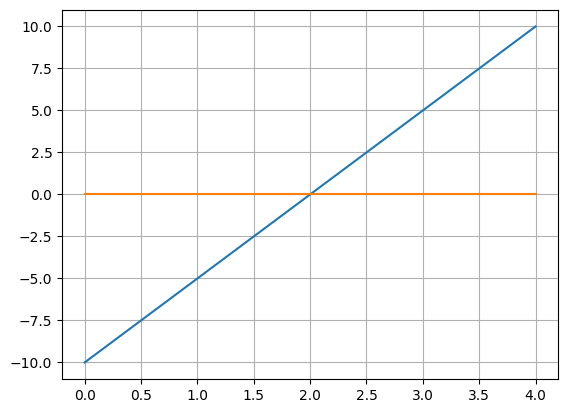

In [30]:
#Practice 5-17
def f(x):
  y = 5*x -10
  return y

x = np.linspace(0,4)
plt.plot(x, f(x))
plt.plot(x,np.zeros(len(x)))
plt.grid(True)


In [31]:
from scipy.optimize import fsolve
x = fsolve(f,2)
print(x)

[2.]


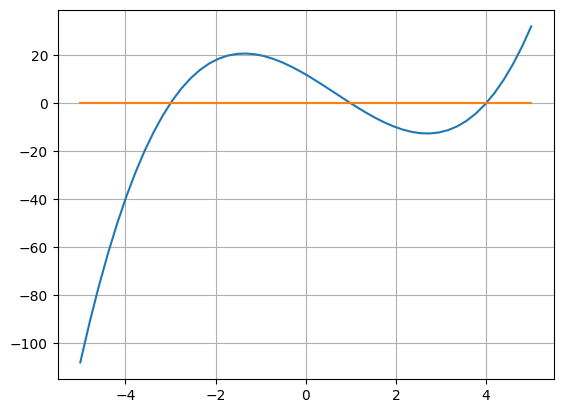

In [33]:
#Practice 5-18
def f2(x):
  y = x**3 -2*x**2 -11 *x+12
  return y

x = np.linspace(-5,5)
plt.plot(x,f2(x))
plt.plot(x,np.zeros(len(x)))
plt.grid(True)

In [34]:
from scipy.optimize import fsolve
x = fsolve(f2, -3)
print(x)

[-3.]


In [35]:
x = fsolve(f2, 1)
print(x)

[1.]


In [36]:
x = fsolve(f2, 4)
print(x)

[4.]


In [39]:
#Comprehensive 5-1
A = np.array([[5,1,0,1],[1,9,-5,7],[0,-5,8,-3],[1,7,-3,10]])
b = np.array([2,10,5,10])

L = sp.linalg.cholesky(A)

t = sp.linalg.solve(L.T.conj(), b)
x = sp.linalg.solve(L,t)

print(x)

[-0.05105105  2.15715716  2.01001001  0.0980981 ]


In [43]:
#Comprehensive 5-2
from scipy import integrate
import math

integrate.dblquad(lambda x,y: 1/(np.sqrt(x+y)*(1+x+y)**2), 0,1,lambda x:0, lambda x:1-x)

(0.285398163397451, 1.5065093369366904e-08)

In [45]:
#Comprehensive 5-3
from scipy.optimize import minimize

def func(x):
  return x**2+1

def cons(x):
  return (x+1)

cons = ({'type':'ineq', 'fun': cons})

x = 2

result = minimize(func, x0 = x, constraints=cons, method= 'SLSQP')
print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.0
       x: [-4.967e-09]
     nit: 3
     jac: [ 0.000e+00]
    nfev: 6
    njev: 3


In [46]:
print('X:',result.x)
print('Y:', result.fun)


X: [-4.96705377e-09]
Y: 1.0
